In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

3404905

In [7]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

3404905

In [9]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

400577

In [11]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

400577

In [13]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

200321

In [15]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

200321

In [17]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [18]:
array_Xtrain

array([[[0.25217391, 0.86956522, 0.25423729, 0.6       , 0.5       ],
        [0.2673913 , 0.86956522, 0.50847458, 0.6       , 0.5       ],
        [0.25652174, 0.86956522, 0.76271186, 0.6       , 0.5       ],
        ...,
        [0.36521739, 0.13043478, 0.        , 1.        , 1.        ],
        [0.38913043, 0.13043478, 0.25423729, 1.        , 1.        ],
        [0.3826087 , 0.13043478, 0.50847458, 1.        , 1.        ]],

       [[0.2673913 , 0.86956522, 0.50847458, 0.6       , 0.5       ],
        [0.25652174, 0.86956522, 0.76271186, 0.6       , 0.5       ],
        [0.27608696, 0.91304348, 0.        , 0.8       , 0.5       ],
        ...,
        [0.38913043, 0.13043478, 0.25423729, 1.        , 1.        ],
        [0.3826087 , 0.13043478, 0.50847458, 1.        , 1.        ],
        [0.35434783, 0.13043478, 0.76271186, 1.        , 1.        ]],

       [[0.25652174, 0.86956522, 0.76271186, 0.6       , 0.5       ],
        [0.27608696, 0.91304348, 0.        , 0.8       , 0.5

In [19]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [20]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=True, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_v3.h5')

Epoch 1/50
106404/106404 [==============================] - 1552s 15ms/step - loss: 0.0180 - mae: 0.0180 - val_loss: 0.0321 - val_mae: 0.0321
Epoch 2/50
106404/106404 [==============================] - 1528s 14ms/step - loss: 0.0161 - mae: 0.0161 - val_loss: 0.0381 - val_mae: 0.0381
Epoch 3/50
106404/106404 [==============================] - 1569s 15ms/step - loss: 0.0177 - mae: 0.0177 - val_loss: 0.0315 - val_mae: 0.0315
Epoch 4/50
106404/106404 [==============================] - 1750s 16ms/step - loss: 0.0166 - mae: 0.0166 - val_loss: 0.0331 - val_mae: 0.0331
Epoch 5/50
106404/106404 [==============================] - 1777s 17ms/step - loss: 0.0253 - mae: 0.0253 - val_loss: 0.0351 - val_mae: 0.0351
Epoch 6/50
106404/106404 [==============================] - 1688s 16ms/step - loss: 0.0220 - mae: 0.0220 - val_loss: 0.0303 - val_mae: 0.0303
Epoch 7/50
106404/106404 [==============================] - 1411s 13ms/step - loss: 0.1271 - mae: 0.1271 - val_loss: 0.0375 - val_mae: 0.0375
Epoch 

6261/6261 [==============================] - 27s 4ms/step - loss: 0.0315 - mae: 0.0315
test loss, test acc: [0.031538225710392, 0.031538225710392]


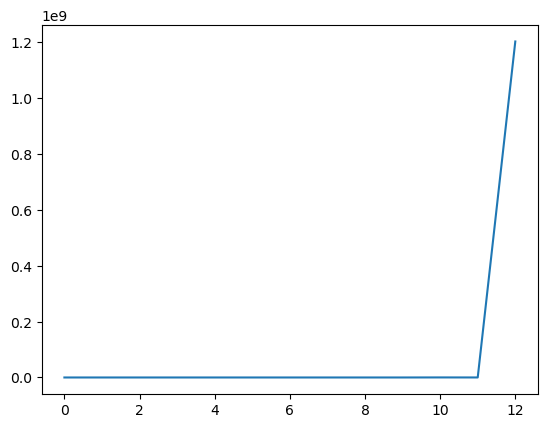

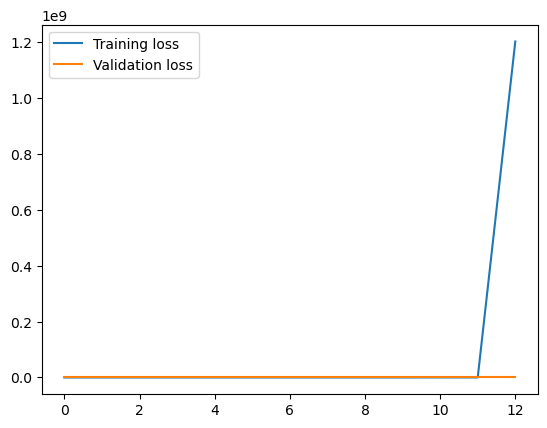

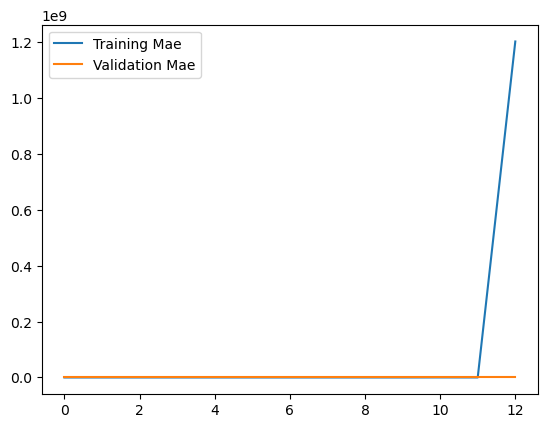

In [21]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6261/6261 [==============================] - 27s 4ms/step


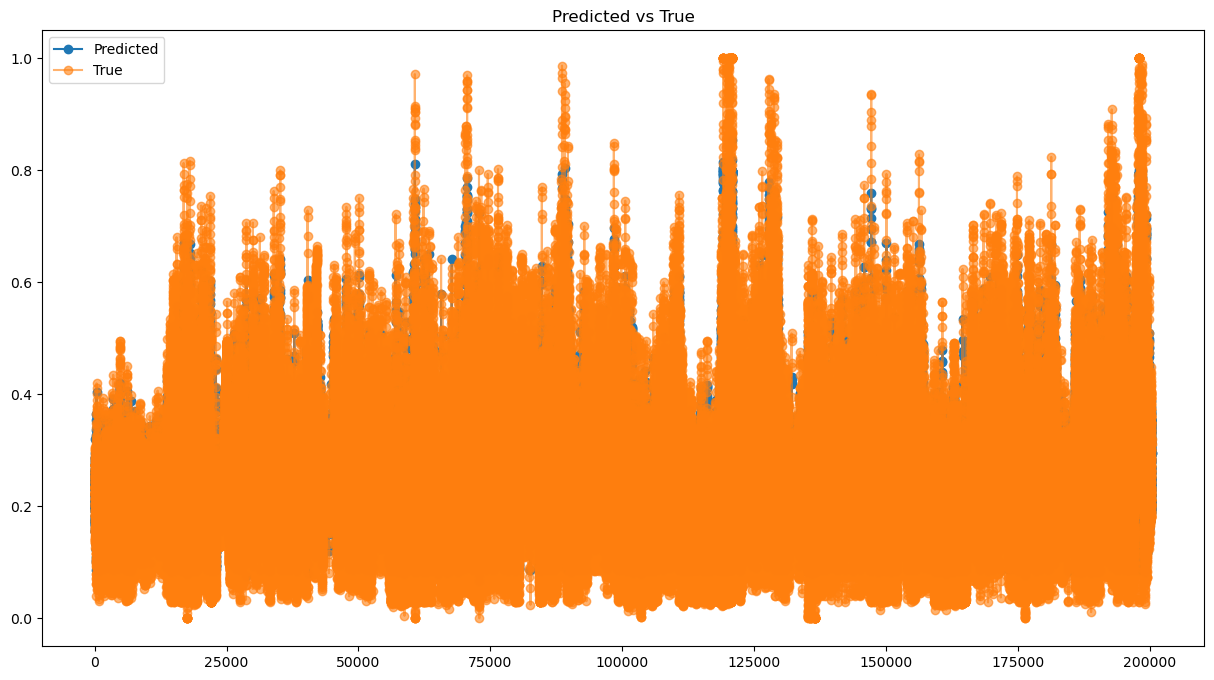

In [22]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [23]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.031538271889642575,
 'mse': 0.04170955669195186,
 'rmse': 0.001739687119439146}